# Modeling

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from numpy import mean
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import IncrementalPCA
from sklearn import tree
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from yellowbrick.model_selection import FeatureImportances
from sklearn.model_selection import GridSearchCV
from collections import Counter
from imblearn.over_sampling import SMOTE

In [3]:
# load data 
data = pd.read_csv('modeling_data.csv')
data = data.drop(data.columns[0], axis=1)
data.head()

,loan_amnt,credit_month,int_rate,emp_length,annual_inc,verification_status,loan_status,dti,delinq_2yrs,fico_range,...,years_of_credit_history,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other
0,5000.0,36,0.1065,10.0,24000.0,1,1,27.65,0.0,735.0,...,26.9,0,0,0,1,1,0,0,0,0
1,2500.0,60,0.1527,0.0,30000.0,1,0,1.00,0.0,740.0,...,12.7,0,0,0,1,0,0,0,0,1
2,2400.0,36,0.1596,10.0,24000.0,0,1,8.72,0.0,735.0,...,10.1,0,0,0,1,0,0,0,0,1
3,10000.0,36,0.1349,10.0,49200.0,1,1,20.00,0.0,690.0,...,15.8,0,0,0,1,0,0,0,0,1
4,3000.0,60,0.1269,1.0,80000.0,1,1,17.94,0.0,695.0,...,15.9,0,0,0,1,0,0,0,0,1


In [3]:
# Split the data into X and y
X = data.drop('loan_status',axis =1)
y = data['loan_status']

In [4]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled_df.head()

,loan_amnt,credit_month,int_rate,emp_length,annual_inc,verification_status,dti,delinq_2yrs,fico_range,inq_last_6mths,...,years_of_credit_history,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other
0,-0.891699,-0.606139,-0.373734,1.355254,-1.295802,0.860477,2.146113,-0.349008,0.600346,0.158815,...,2.213023,-0.895353,-0.050448,-0.288856,1.050274,2.597111,-0.940584,-0.284802,-0.241236,-0.610405
1,-1.263575,1.649787,0.931412,-1.416519,-1.107938,0.860477,-1.844474,-0.349008,0.746837,2.185639,...,-0.144502,-0.895353,-0.050448,-0.288856,1.050274,-0.385043,-0.940584,-0.284802,-0.241236,1.638258
2,-1.278450,-0.606139,1.126336,1.355254,-1.295802,-1.162147,-0.688476,-0.349008,0.600346,1.172227,...,-0.576162,-0.895353,-0.050448,-0.288856,1.050274,-0.385043,-0.940584,-0.284802,-0.241236,1.638258
3,-0.147948,-0.606139,0.428563,1.355254,-0.506776,0.860477,1.000597,-0.349008,-0.718073,0.158815,...,0.370169,-0.895353,-0.050448,-0.288856,1.050274,-0.385043,-0.940584,-0.284802,-0.241236,1.638258
4,-1.189200,1.649787,0.202564,-1.139342,0.457589,0.860477,0.692132,-0.349008,-0.571582,-0.854597,...,0.386771,-0.895353,-0.050448,-0.288856,1.050274,-0.385043,-0.940584,-0.284802,-0.241236,1.638258


<Axes: >

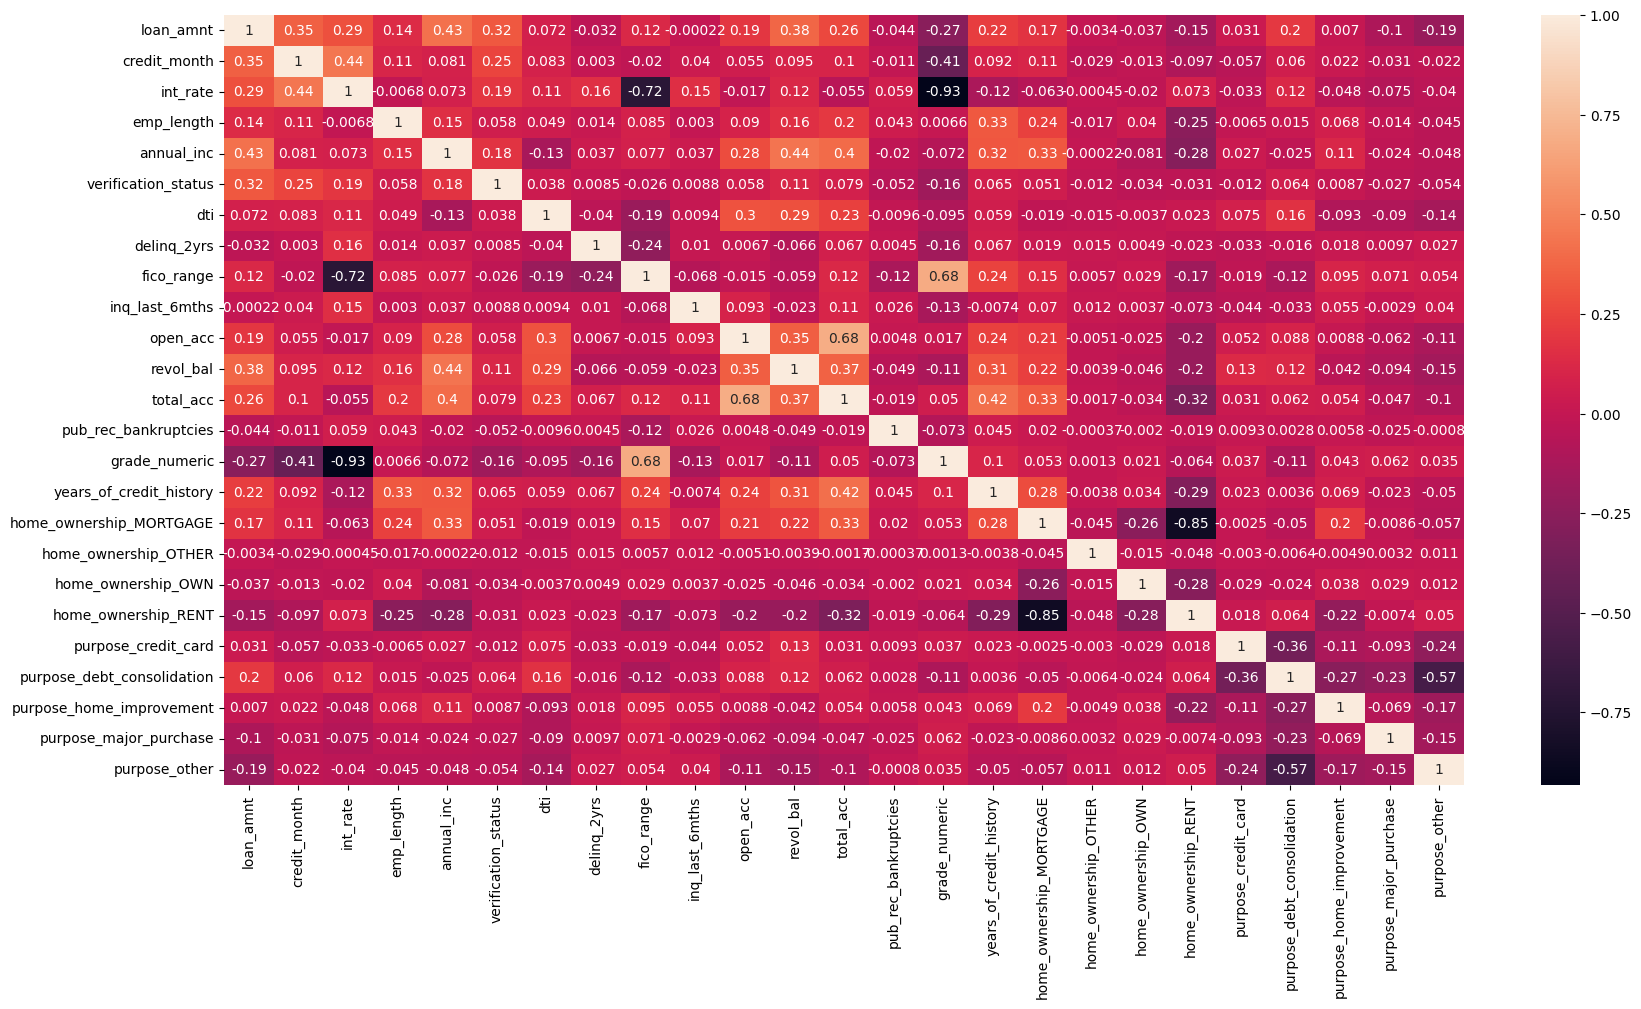

In [6]:
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)

## Clusterization

### K-mean

In [7]:
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_scaled_df)

/home/proukariot/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=1000, n_clusters=5)

/home/proukariot/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/proukariot/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/proukariot/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/proukariot/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

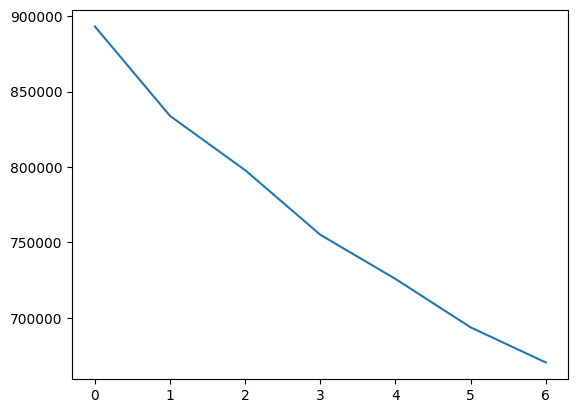

In [8]:
# Elbow curve to determine the number of clusters
ssd = [] # Sum of squared distances
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_scaled_df)
    
    ssd.append(kmeans.inertia_) #Sum of squared distances
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [13]:
# Internal measure - silhouette index
# Average distance between observations within a group (a) and average distance of an observation to the nearest "outside" group (b).
# Silhouette is calculated for each observation as follows: (a - b)/max(a, b)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_scaled_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

/home/proukariot/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=2, the silhouette score is 0.1074686159252078


/home/proukariot/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=3, the silhouette score is 0.100274025143377


/home/proukariot/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=4, the silhouette score is 0.1117295426469182


/home/proukariot/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=5, the silhouette score is 0.08497153031098921


/home/proukariot/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=6, the silhouette score is 0.10169322676031557


/home/proukariot/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=7, the silhouette score is 0.0942847351953481


/home/proukariot/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=8, the silhouette score is 0.11091721360810937


#### Best score for 4 and 8 clusters, checking 4.

In [9]:
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=42)
kmeans.fit(X)

/home/proukariot/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [10]:
data['K-Means_Cluster_ID'] = kmeans.labels_
data.head()

,loan_amnt,credit_month,int_rate,emp_length,annual_inc,verification_status,loan_status,dti,delinq_2yrs,fico_range,...,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other,K-Means_Cluster_ID
0,5000.0,36,0.1065,10.0,24000.0,1,1,27.65,0.0,735.0,...,0,0,0,1,1,0,0,0,0,2
1,2500.0,60,0.1527,0.0,30000.0,1,0,1.00,0.0,740.0,...,0,0,0,1,0,0,0,0,1,2
2,2400.0,36,0.1596,10.0,24000.0,0,1,8.72,0.0,735.0,...,0,0,0,1,0,0,0,0,1,2
3,10000.0,36,0.1349,10.0,49200.0,1,1,20.00,0.0,690.0,...,0,0,0,1,0,0,0,0,1,1
4,3000.0,60,0.1269,1.0,80000.0,1,1,17.94,0.0,695.0,...,0,0,0,1,0,0,0,0,1,3


<Axes: xlabel='K-Means_Cluster_ID', ylabel='loan_amnt'>

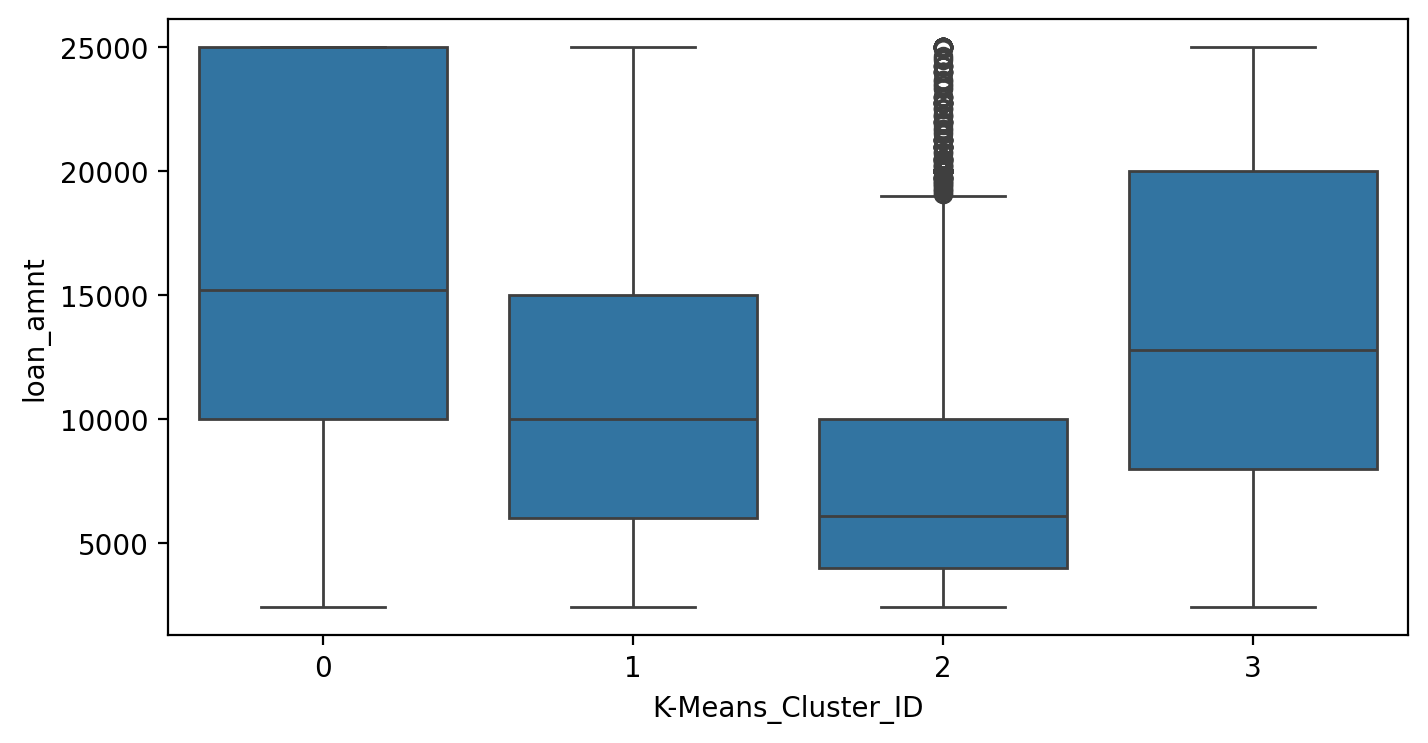

In [11]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='loan_amnt', data=data)

<Axes: xlabel='K-Means_Cluster_ID', ylabel='annual_inc'>

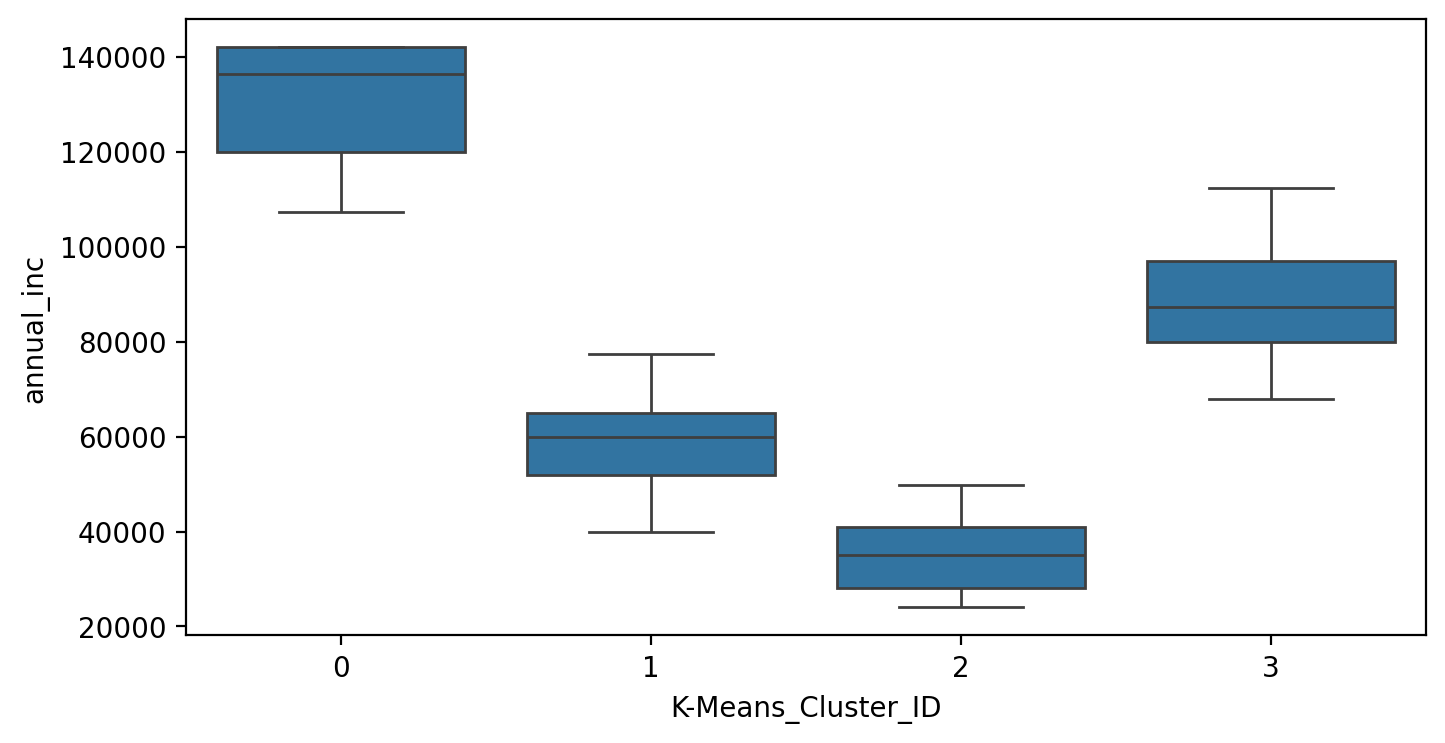

In [12]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='annual_inc', data=data)

### Hierarchical clustering

In [19]:
# single linkage
sl_mergings = linkage(X_scaled_df, method="single", metric='euclidean')

In [20]:
# complete linkage
cl_mergings = linkage(X_scaled_df, method="complete", metric='euclidean')

In [355]:
#Two clusters with single linkge
sl_cluster_labels = cut_tree(sl_mergings, n_clusters=4).reshape(-1, )

In [ ]:
#2 klastry z complete linkage
cl_cluster_labels = cut_tree(cl_mergings, n_clusters=4).reshape(-1, )

In [356]:
data["Hierarchical_Cluster_labels"] = sl_cluster_labels
data.head()

,loan_amnt,credit_month,int_rate,emp_length,annual_inc,verification_status,loan_status,dti,delinq_2yrs,fico_range,...,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,5000.0,36,0.1065,10.0,24000.0,1,1,27.65,0.0,735.0,...,0,0,1,1,0,0,0,0,3,0
1,2500.0,60,0.1527,0.0,30000.0,1,0,1.00,0.0,740.0,...,0,0,1,0,0,0,0,1,3,0
2,2400.0,36,0.1596,10.0,24000.0,0,1,8.72,0.0,735.0,...,0,0,1,0,0,0,0,1,3,0
3,10000.0,36,0.1349,10.0,49200.0,1,1,20.00,0.0,690.0,...,0,0,1,0,0,0,0,1,0,0
4,3000.0,60,0.1269,1.0,80000.0,1,1,17.94,0.0,695.0,...,0,0,1,0,0,0,0,1,2,0


<Axes: xlabel='Hierarchical_Cluster_labels', ylabel='loan_amnt'>

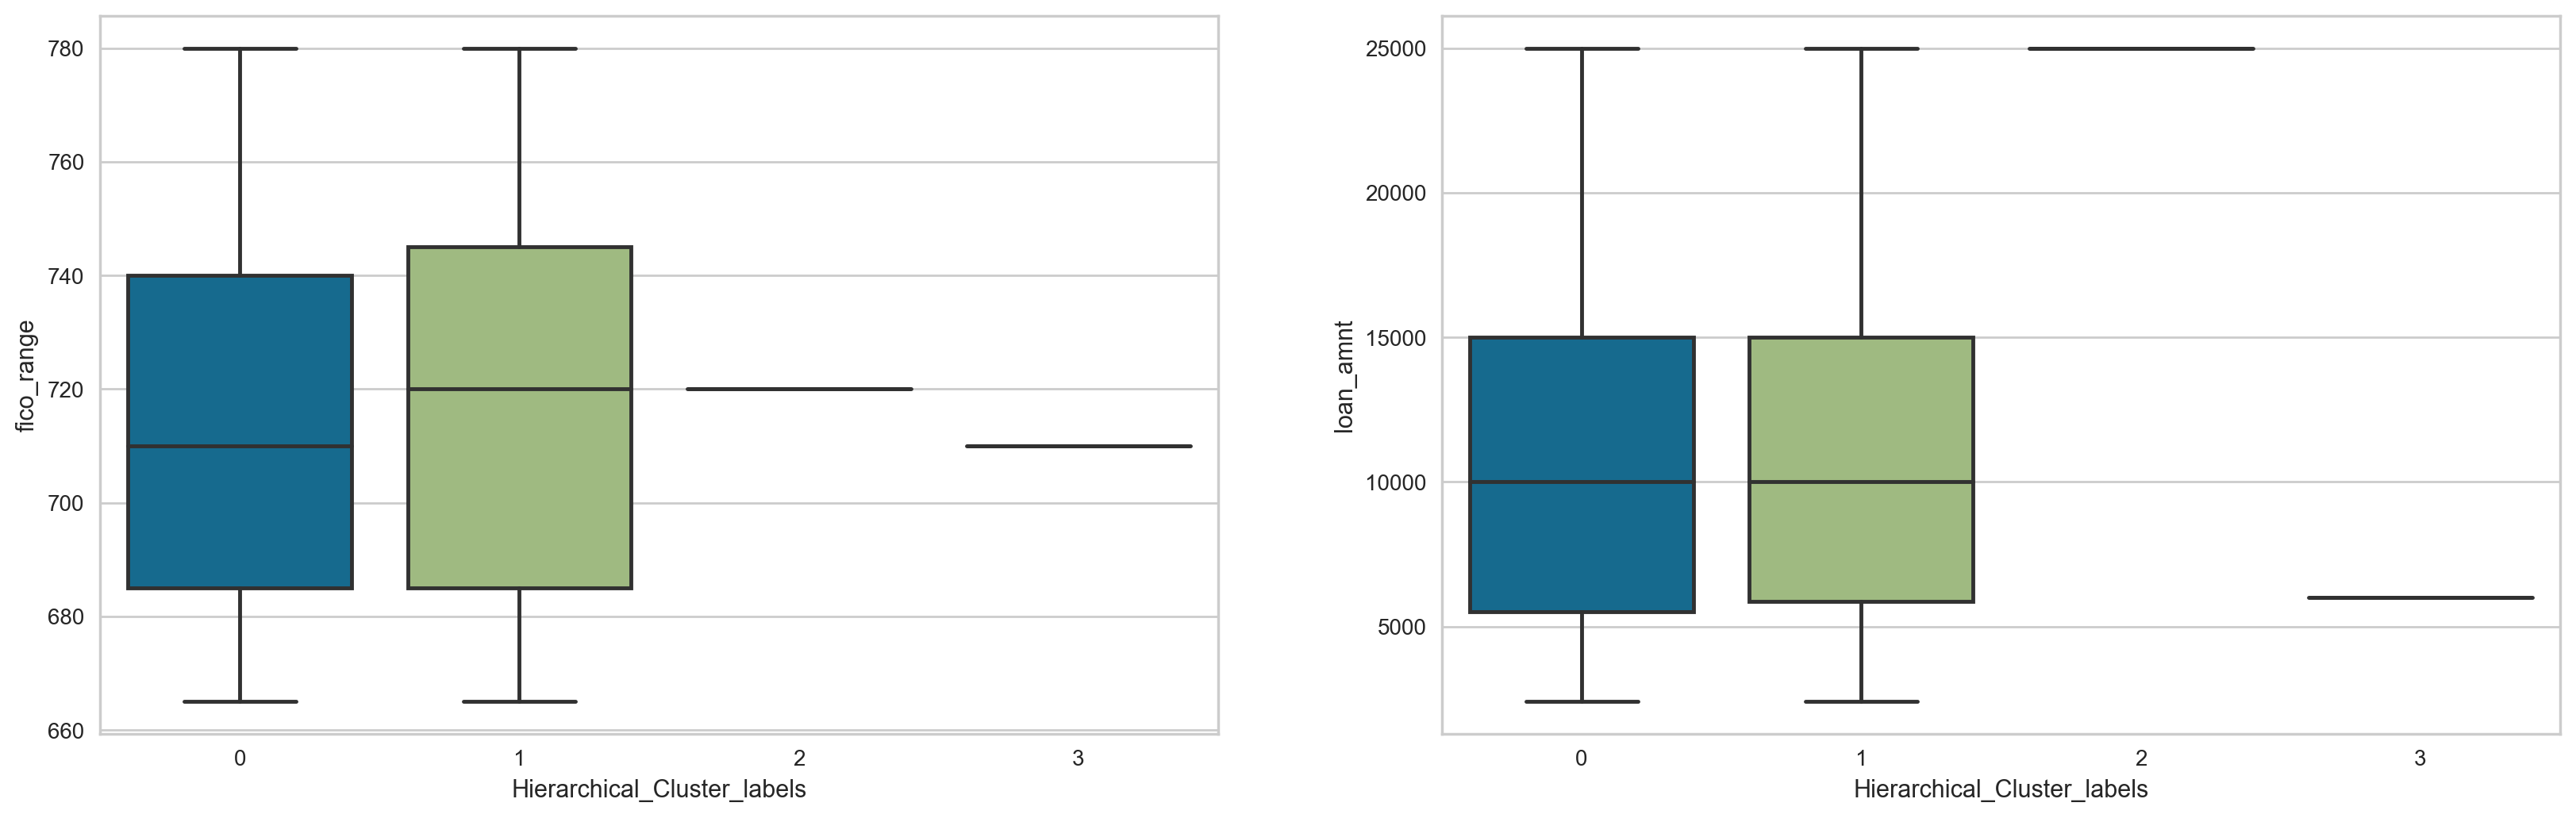

In [357]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,2,1)
sns.boxplot(x='Hierarchical_Cluster_labels', y='fico_range', data=data)

plt.subplot(3,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels', y='loan_amnt', data=data)

<Axes: xlabel='Hierarchical_Cluster_labels', ylabel='annual_inc'>

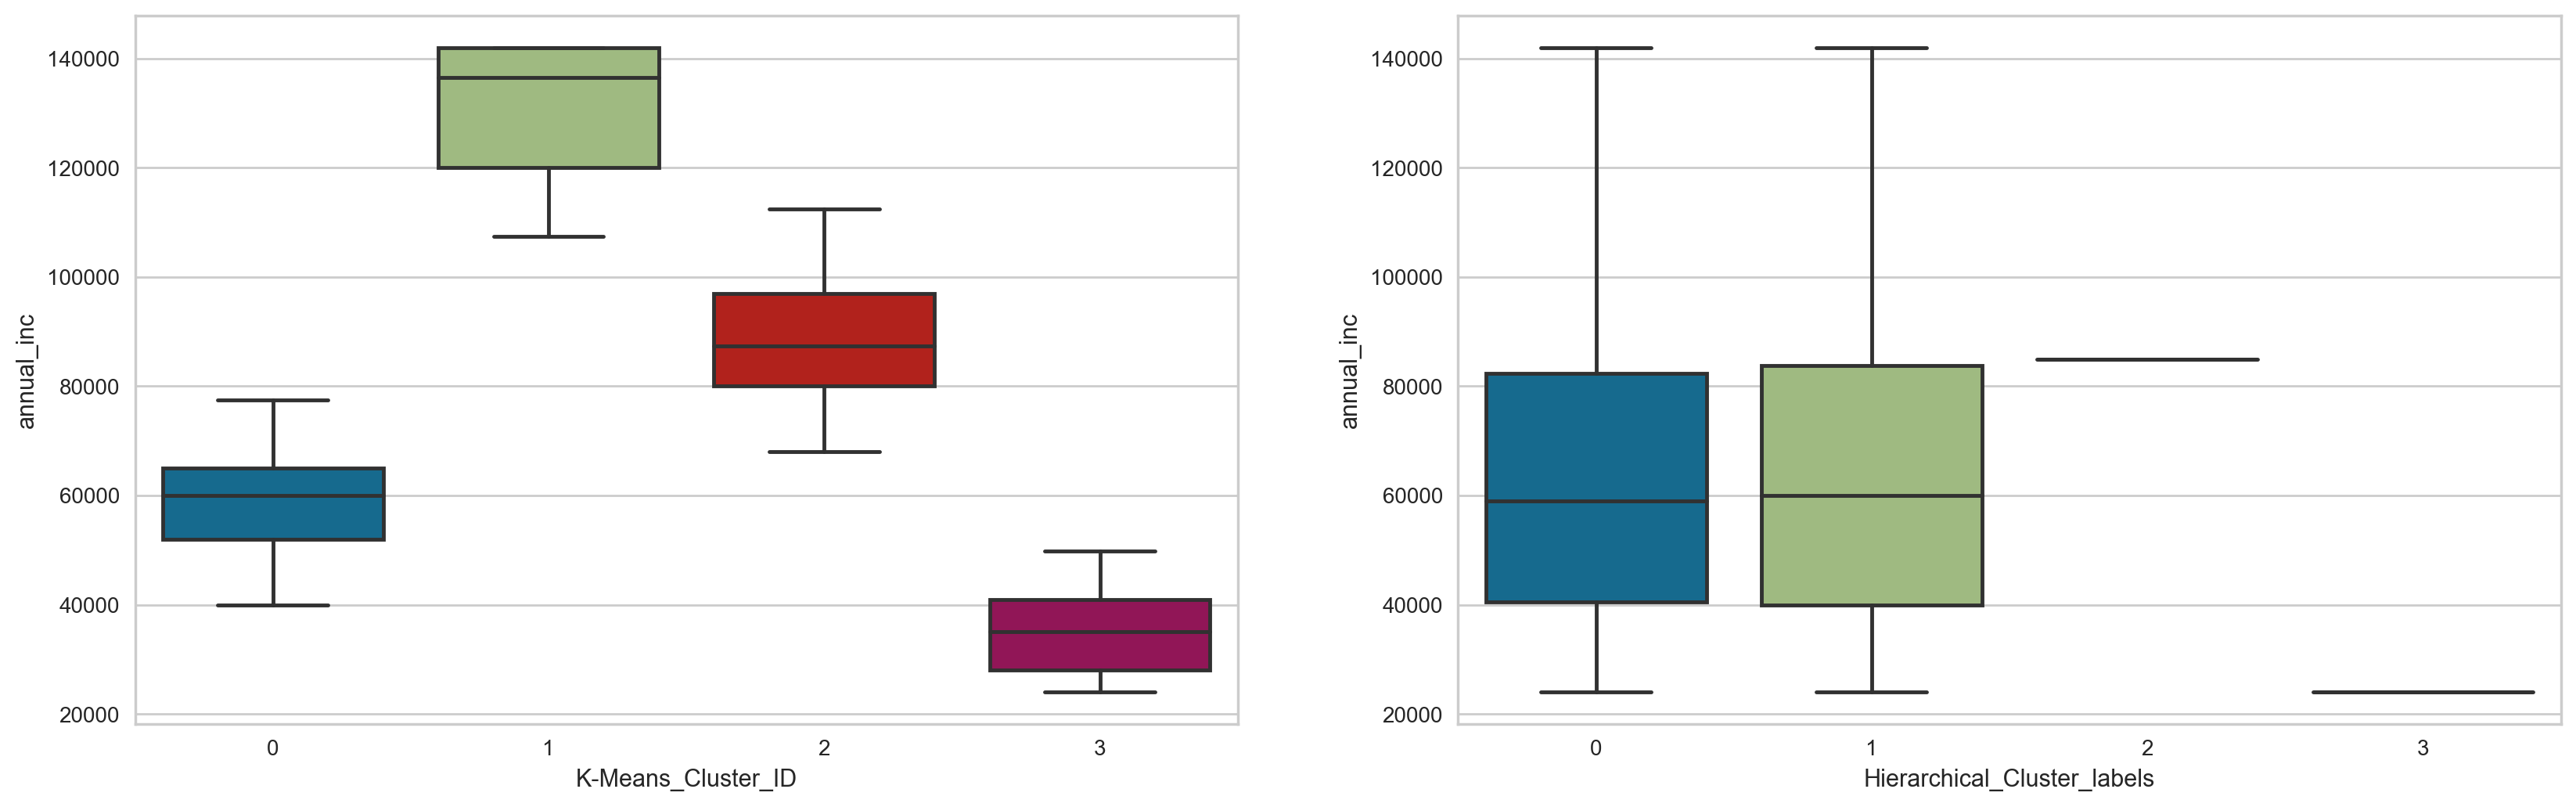

In [358]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,2,1)
sns.boxplot(x='K-Means_Cluster_ID', y='annual_inc', data=data)

plt.subplot(3,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels', y='annual_inc', data=data)


### DBScan

In [13]:
dbscan=DBSCAN()
dbscan.fit(X_scaled_df)

DBSCAN()

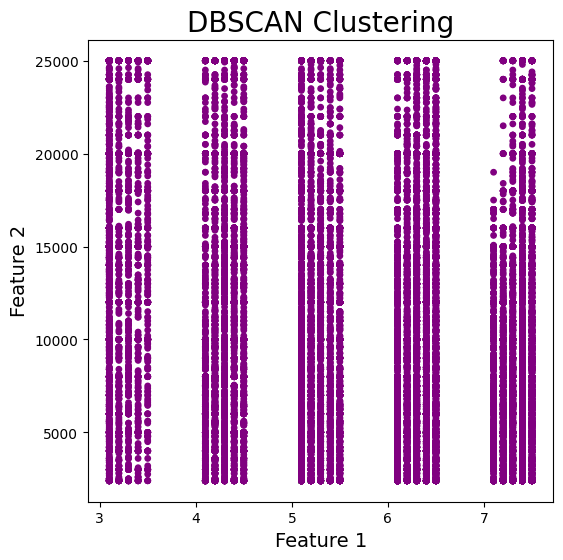

In [14]:
data['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
colors=['purple','green']
plt.figure(figsize=(6,6))
plt.scatter(data['grade_numeric'], data['loan_amnt'],c=data['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## Modeling

#### Training of six models

In [15]:
# Split data into test and train
x_train, x_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

### Model 1: Decision Tree

In [16]:
model1 = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model1.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1))

In [17]:
acc_BC = model1.score(x_test, y_test)
acc_BC_t = model1.score(x_train, y_train)

In [18]:
roc_auc_score1 = metrics.roc_auc_score(y_test, model1.predict_proba(x_test)[:, 1])

In [19]:
results = pd.DataFrame({'Method':['BaggingClassifier'], 'accuracy_test': acc_BC, 'accuracy_train': acc_BC_t, 'ROC_AUC_score': roc_auc_score1})
results = results[['Method', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results

,Method,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.83001,0.993537,0.625626


### Model 2: XGBoost

In [20]:
model2 = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model2.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [21]:
acc_xgb = model2.score(x_test, y_test)
acc_xgb_t = model2.score(x_train, y_train)

In [22]:
roc_auc_score2 = metrics.roc_auc_score(y_test, model2.predict_proba(x_test)[:, 1])

In [23]:
tempResultsDf = pd.DataFrame({'Method':['XGBoost'], 'accuracy_test': acc_xgb, 'accuracy_train': acc_xgb_t, 'ROC_AUC_score': roc_auc_score2})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results

,Method,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.830010,0.993537,0.625626
0,XGBoost,0.858328,0.857127,0.682087


### Model 3: Logistic regression

In [24]:
model3 = LogisticRegression(solver = 'lbfgs')
model3.fit(x_train, y_train)

LogisticRegression()

In [25]:
acc_LR = model3.score(x_test, y_test)
acc_LR_t = model3.score(x_train, y_train)

In [26]:
roc_auc_score3 = metrics.roc_auc_score(y_test, model3.predict_proba(x_test)[:, 1])

In [27]:
tempResultsDf = pd.DataFrame({'Method':['LogisticRegression'], 'accuracy_test': acc_LR, 'accuracy_train': acc_LR_t, 'ROC_AUC_score': roc_auc_score3})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results

,Method,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.830010,0.993537,0.625626
0,XGBoost,0.858328,0.857127,0.682087
0,LogisticRegression,0.857741,0.857092,0.689967


### Model 4: AdaBoost

In [28]:
model4 = AdaBoostClassifier(random_state=1)
model4.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

In [29]:
acc_ada = model4.score(x_test, y_test)
acc_ada_t = model4.score(x_train, y_train)

In [30]:
roc_auc_score4 = metrics.roc_auc_score(y_test, model4.predict_proba(x_test)[:, 1])

In [31]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoostClassifier'], 'accuracy_test': acc_ada, 'accuracy_train': acc_ada_t, 'ROC_AUC_score': roc_auc_score4})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results

,Method,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.830010,0.993537,0.625626
0,XGBoost,0.858328,0.857127,0.682087
0,LogisticRegression,0.857741,0.857092,0.689967
0,AdaBoostClassifier,0.857406,0.856984,0.691030


### Model 5: GradientBoosting

In [32]:
model5 = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model5.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=1)

In [33]:
acc_GB = model5.score(x_test, y_test)
acc_GB_t = model5.score(x_train, y_train)

In [34]:
roc_auc_score5 = metrics.roc_auc_score(y_test, model5.predict_proba(x_test)[:, 1])

In [35]:
tempResultsDf = pd.DataFrame({'Method':['GradientBoostingClassifier'], 'accuracy_test': acc_GB, 'accuracy_train': acc_GB_t, 'ROC_AUC_score': roc_auc_score5})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results

,Method,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.830010,0.993537,0.625626
0,XGBoost,0.858328,0.857127,0.682087
0,LogisticRegression,0.857741,0.857092,0.689967
0,AdaBoostClassifier,0.857406,0.856984,0.691030
0,GradientBoostingClassifier,0.858328,0.857127,0.676708


### Model 6: Random Forest

In [36]:
model6 = RandomForestClassifier()
model6.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
acc_RF = model6.score(x_test, y_test)
acc_RF_t = model6.score(x_train, y_train)

In [38]:
roc_auc_score6 = metrics.roc_auc_score(y_test, model6.predict_proba(x_test)[:, 1])

In [39]:
tempResultsDf = pd.DataFrame({'Method':['RandomForestClassifier'], 'accuracy_test': acc_RF, 'accuracy_train': acc_RF_t, 'ROC_AUC_score': roc_auc_score6})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results

,Method,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.830010,0.993537,0.625626
0,XGBoost,0.858328,0.857127,0.682087
0,LogisticRegression,0.857741,0.857092,0.689967
0,AdaBoostClassifier,0.857406,0.856984,0.691030
0,GradientBoostingClassifier,0.858328,0.857127,0.676708
0,RandomForestClassifier,0.857071,1.000000,0.677750


### PCA

#### Standarize data to PCA

In [40]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_scaled_df)

PCA(random_state=42)

In [41]:
pca.components_[0]

array([ 0.3152957 ,  0.1792091 ,  0.10153366,  0.20193527,  0.33036845,
        0.14864303,  0.12584689,  0.02240857,  0.02946337,  0.05442933,
        0.30633937,  0.33038263,  0.37144335, -0.00215216, -0.09734909,
        0.29095385,  0.32103874, -0.00723424, -0.02563212, -0.30505836,
        0.02657357,  0.08428359,  0.07675561, -0.05919064, -0.1297481 ])

In [42]:
pca.explained_variance_ratio_

array([1.47368635e-01, 1.23137300e-01, 7.30364470e-02, 5.93199093e-02,
       5.56253477e-02, 4.91262358e-02, 4.68768221e-02, 4.37506028e-02,
       4.35257270e-02, 4.11109797e-02, 3.99784086e-02, 3.92644431e-02,
       3.72556420e-02, 3.48037403e-02, 3.38778377e-02, 3.07495290e-02,
       2.61670370e-02, 2.23649405e-02, 1.78720007e-02, 1.50299157e-02,
       1.08996722e-02, 6.53038069e-03, 2.32844628e-03, 8.34741619e-33,
       2.21979499e-33])

In [43]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.14736864, 0.27050593, 0.34354238, 0.40286229, 0.45848764,
       0.50761387, 0.5544907 , 0.5982413 , 0.64176703, 0.68287801,
       0.72285641, 0.76212086, 0.7993765 , 0.83418024, 0.86805808,
       0.89880761, 0.92497464, 0.94733958, 0.96521159, 0.9802415 ,
       0.99114117, 0.99767155, 1.        , 1.        , 1.        ])

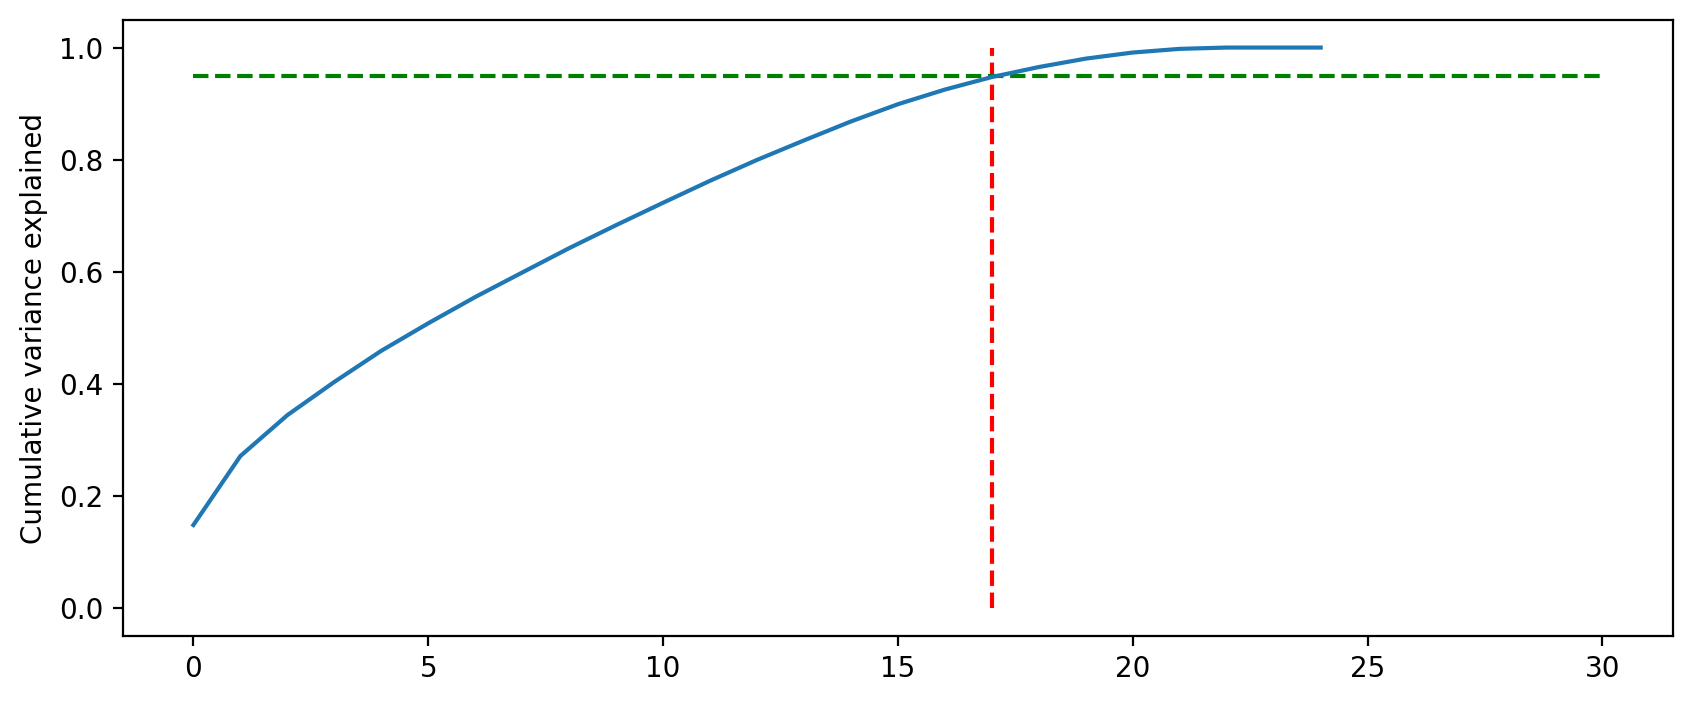

In [44]:
fig = plt.figure(figsize=[10,4],dpi=200)
plt.vlines(x=17, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [45]:

pca_final = IncrementalPCA(n_components=17)
X_pca_final = pca_final.fit_transform(X_scaled_df)

In [46]:
print(X_scaled_df.shape)
print(X_pca_final.shape)

(39786, 25)
(39786, 17)


In [47]:
corrmat = np.corrcoef(X_pca_final.transpose())

In [48]:
corrmat.shape

(17, 17)

<Axes: >

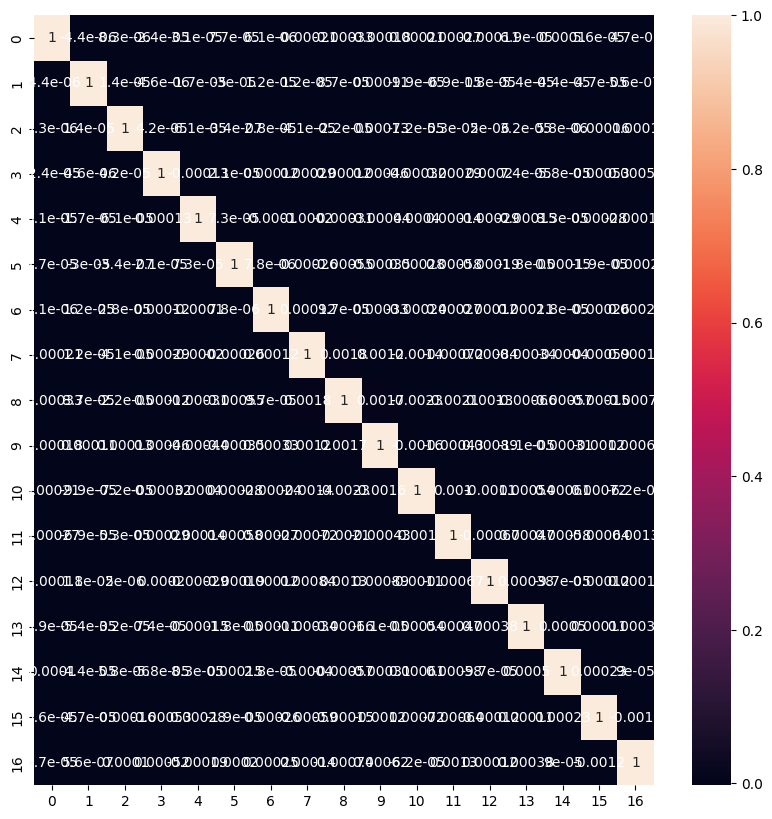

In [49]:
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=True)

In [50]:
colnames = list(X.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df.head()

,PC1,PC2,Feature
0,0.315296,0.127959,loan_amnt
1,0.179209,0.230467,credit_month
2,0.101534,0.519868,int_rate
3,0.201935,-0.073532,emp_length
4,0.330368,-0.043657,annual_inc


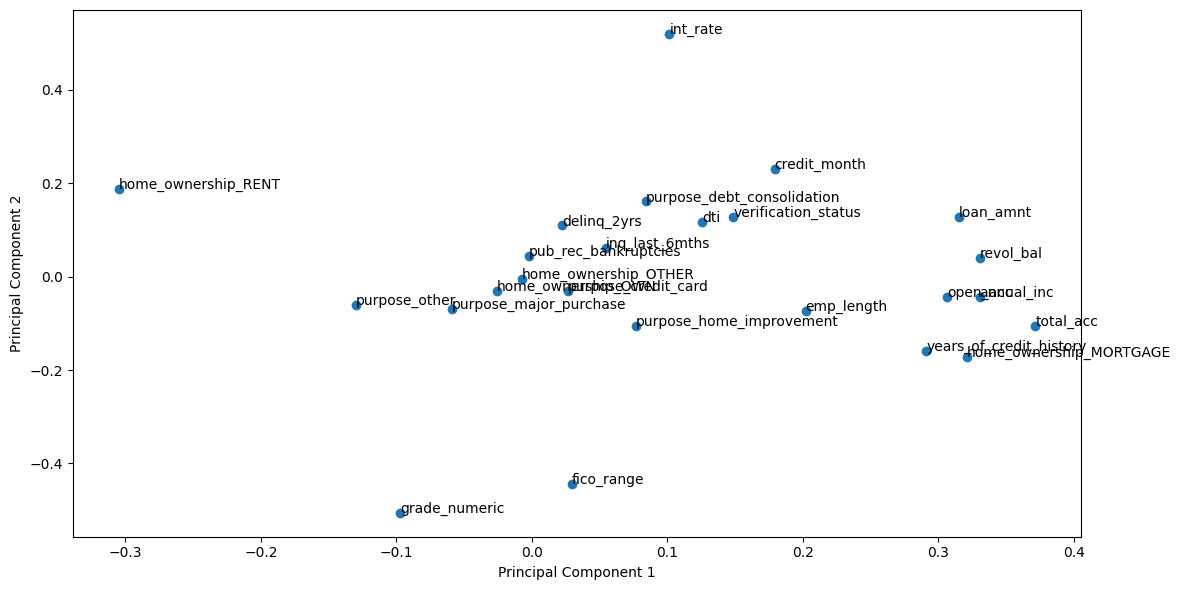

In [51]:
fig = plt.figure(figsize = (12,6))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

### Train the same models on compresed data

In [52]:
# Split data into test and train
x_train, x_test, y_train, y_test = train_test_split(X_pca_final, y, test_size=0.3, random_state=0)

In [53]:
model1_pca = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model1_pca.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1))

In [54]:
acc_BC = model1_pca.score(x_test, y_test)
acc_BC_t = model1_pca.score(x_train, y_train)

In [55]:
roc_auc_score1 = metrics.roc_auc_score(y_test, model1_pca.predict_proba(x_test)[:, 1])

In [56]:
results_pca = pd.DataFrame({'Method_PCA':['BaggingClassifier'], 'accuracy_test': acc_BC, 'accuracy_train': acc_BC_t, 'ROC_AUC_score': roc_auc_score1})
results_pca = results_pca[['Method_PCA', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results_pca

,Method_PCA,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.828502,0.992962,0.616744


In [57]:
model2_pca = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model2_pca.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [58]:
acc_xgb = model2_pca.score(x_test, y_test)
acc_xgb_t = model2_pca.score(x_train, y_train)

In [59]:
roc_auc_score2 = metrics.roc_auc_score(y_test, model2_pca.predict_proba(x_test)[:, 1])

In [60]:
tempResultsDf = pd.DataFrame({'Method_PCA':['XGBoost'], 'accuracy_test': acc_xgb, 'accuracy_train': acc_xgb_t, 'ROC_AUC_score': roc_auc_score2})
results_pca = pd.concat([results_pca, tempResultsDf])
results_pca = results_pca[['Method_PCA', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results_pca

,Method_PCA,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.828502,0.992962,0.616744
0,XGBoost,0.850871,0.860323,0.679465


In [61]:
model3_pca = LogisticRegression(solver = 'lbfgs')
model3_pca.fit(x_train, y_train)

LogisticRegression()

In [62]:
acc_LR = model3_pca.score(x_test, y_test)
acc_LR_t = model3_pca.score(x_train, y_train)

In [63]:
roc_auc_score3 = metrics.roc_auc_score(y_test, model3_pca.predict_proba(x_test)[:, 1])

In [64]:
tempResultsDf = pd.DataFrame({'Method_PCA':['LogisticRegression'], 'accuracy_test': acc_LR, 'accuracy_train': acc_LR_t, 'ROC_AUC_score': roc_auc_score3})
results_pca = pd.concat([results_pca, tempResultsDf])
results_pca = results_pca[['Method_PCA', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results_pca

,Method_PCA,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.828502,0.992962,0.616744
0,XGBoost,0.850871,0.860323,0.679465
0,LogisticRegression,0.851123,0.860036,0.688576


In [65]:
model4_pca = AdaBoostClassifier(random_state=1)
model4_pca.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

In [66]:
acc_ada = model4_pca.score(x_test, y_test)
acc_ada_t = model4_pca.score(x_train, y_train)

In [67]:
roc_auc_score4 = metrics.roc_auc_score(y_test, model4_pca.predict_proba(x_test)[:, 1])

In [68]:
tempResultsDf = pd.DataFrame({'Method_PCA':['AdaBoostClassifier'], 'accuracy_test': acc_ada, 'accuracy_train': acc_ada_t, 'ROC_AUC_score': roc_auc_score4})
results_pca = pd.concat([results_pca, tempResultsDf])
results_pca = results_pca[['Method_PCA', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results_pca

,Method_PCA,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.828502,0.992962,0.616744
0,XGBoost,0.850871,0.860323,0.679465
0,LogisticRegression,0.851123,0.860036,0.688576
0,AdaBoostClassifier,0.850704,0.859785,0.685474


In [69]:
model5_pca = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model5_pca.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=1)

In [70]:
acc_GB = model5_pca.score(x_test, y_test)
acc_GB_t = model5_pca.score(x_train, y_train)

In [71]:
roc_auc_score5 = metrics.roc_auc_score(y_test, model5_pca.predict_proba(x_test)[:, 1])

In [72]:
tempResultsDf = pd.DataFrame({'Method_PCA':['GradientBoostingClassifier'], 'accuracy_test': acc_GB, 'accuracy_train': acc_GB_t, 'ROC_AUC_score': roc_auc_score5})
results_pca = pd.concat([results_pca, tempResultsDf])
results_pca = results_pca[['Method_PCA', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results_pca

,Method_PCA,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.828502,0.992962,0.616744
0,XGBoost,0.850871,0.860323,0.679465
0,LogisticRegression,0.851123,0.860036,0.688576
0,AdaBoostClassifier,0.850704,0.859785,0.685474
0,GradientBoostingClassifier,0.850871,0.860323,0.667296


In [73]:
model6_pca = RandomForestClassifier()
model6_pca.fit(x_train, y_train)

RandomForestClassifier()

In [74]:
acc_RF = model6_pca.score(x_test, y_test)
acc_RF_t = model6_pca.score(x_train, y_train)

In [75]:
roc_auc_score6 = metrics.roc_auc_score(y_test, model6_pca.predict_proba(x_test)[:, 1])

In [76]:
tempResultsDf = pd.DataFrame({'Method_PCA':['RandomForestClassifier'], 'accuracy_test': acc_RF, 'accuracy_train': acc_RF_t, 'ROC_AUC_score': roc_auc_score6})
results_pca = pd.concat([results_pca, tempResultsDf])
results_pca = results_pca[['Method_PCA', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results_pca

,Method_PCA,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.828502,0.992962,0.616744
0,XGBoost,0.850871,0.860323,0.679465
0,LogisticRegression,0.851123,0.860036,0.688576
0,AdaBoostClassifier,0.850704,0.859785,0.685474
0,GradientBoostingClassifier,0.850871,0.860323,0.667296
0,RandomForestClassifier,0.849615,1.000000,0.661264


In [77]:
# Compare the results of the models with and without PCA
results_compare = pd.concat([results, results_pca], axis=1)
results_compare

,Method,accuracy_test,accuracy_train,ROC_AUC_score,Method_PCA,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.830010,0.993537,0.625626,BaggingClassifier,0.828502,0.992962,0.616744
0,XGBoost,0.858328,0.857127,0.682087,XGBoost,0.850871,0.860323,0.679465
0,LogisticRegression,0.857741,0.857092,0.689967,LogisticRegression,0.851123,0.860036,0.688576
0,AdaBoostClassifier,0.857406,0.856984,0.691030,AdaBoostClassifier,0.850704,0.859785,0.685474
0,GradientBoostingClassifier,0.858328,0.857127,0.676708,GradientBoostingClassifier,0.850871,0.860323,0.667296
0,RandomForestClassifier,0.857071,1.000000,0.677750,RandomForestClassifier,0.849615,1.000000,0.661264


### Chosing of one model based on AUC score

#### Model 3 - Logistic regression

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

In [79]:
model_final = LogisticRegression( solver='liblinear')
model_final.fit(x_train, y_train)
roc_auc_score = metrics.roc_auc_score(y_test, model_final.predict_proba(x_test)[:, 1])
roc_auc_score

0.6899678745946083

### Cross validation

In [80]:
num_folds = 10
kfold = KFold(n_splits=num_folds)

In [81]:
scores_acc = cross_val_score(model_final, x_train, y_train, cv=kfold, scoring="accuracy")
scores_roc = cross_val_score(model_final, X_scaled_df, y, cv=kfold, scoring='roc_auc')

print('Mean Accuracy:%.3f' % mean(scores_acc))
print('Mean ROC AUC: %.3f' % mean(scores_roc))

Mean Accuracy:0.857
Mean ROC AUC: 0.688


In [82]:
for num_folds in [2,5,10,15,25,50,100,500]:
    kfold = KFold(n_splits=num_folds)
    scores = cross_val_score(model_final, X_scaled_df, y, scoring='roc_auc', cv=kfold)
    print('Mean ROC AUC for', num_folds,'folds: %.3f' % mean(scores))

Mean ROC AUC for 2 folds: 0.686
Mean ROC AUC for 5 folds: 0.687
Mean ROC AUC for 10 folds: 0.688
Mean ROC AUC for 15 folds: 0.689
Mean ROC AUC for 25 folds: 0.689
Mean ROC AUC for 50 folds: 0.689
Mean ROC AUC for 100 folds: 0.689
Mean ROC AUC for 500 folds: 0.690


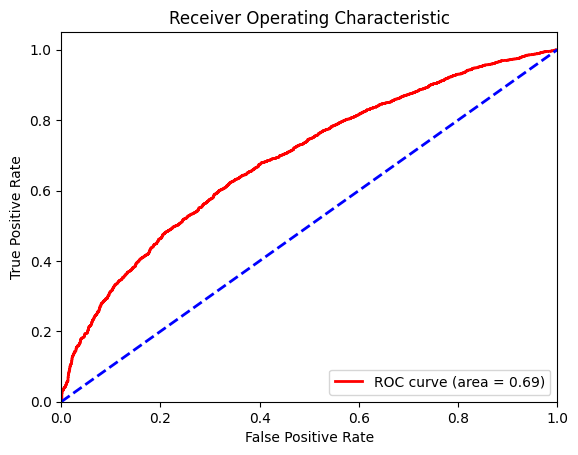

In [83]:
# ROC curve
y_prob = model_final.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="red", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="blue", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

### Feature Importance 

/home/proukariot/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/proukariot/anaconda3/lib/python3.11/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


<bound method Visualizer.show of FeatureImportances(ax=<Axes: >,
                   estimator=LogisticRegression(solver='liblinear'),
                   relative=False)>

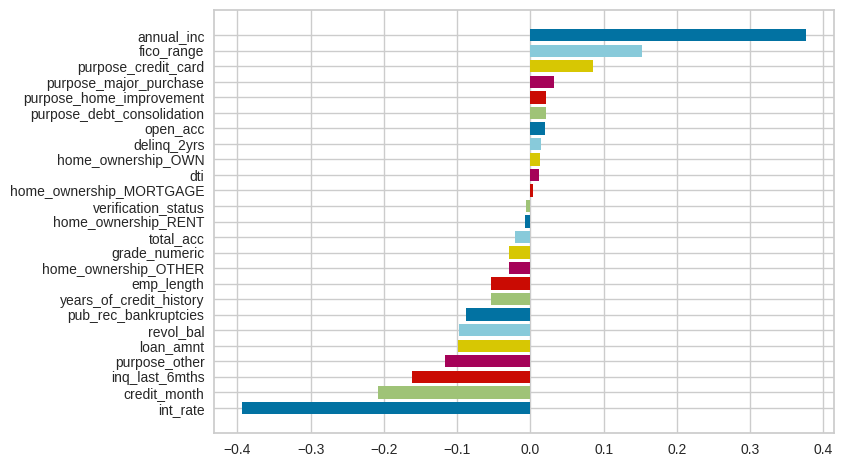

In [86]:
# Feature importance plot
f_imp = FeatureImportances(model_final, relative=False)
f_imp.fit(X_scaled_df, y)
f_imp.show

#### The features on which the model bases its decisions seem to be fully justified.

### GridSearchCV - hyperparameter tuning method

In [87]:
param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3,3,7)
}

hip_par = GridSearchCV(model_final, param_grid, cv=kfold, scoring='roc_auc')
hip_par.fit(x_train, y_train)

best_params = hip_par.best_params_
best_model = hip_par.best_estimator_

/home/proukariot/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10500 fits failed out of a total of 35000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3500 fits failed with the following error:
Traceback (most recent call last):
  File "/home/proukariot/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/proukariot/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/proukariot/anaconda3/lib/python3.11/site-packages/sklearn/

In [89]:
print("ROC_AUC_score :", hip_par.best_score_)


ROC_AUC_score : 0.6924345569674554


In [90]:
print(best_model)
print(best_params)

LogisticRegression(C=0.01)
{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [91]:
best_model.fit(x_train, y_train)

LogisticRegression(C=0.01)

In [92]:
acc_LR_hp = best_model.score(x_test, y_test)
acc_LR_t_hp = best_model.score(x_train, y_train)

In [93]:
roc_auc_score_final = metrics.roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])

In [94]:
results_final = pd.DataFrame({'Method':['Logistic Regresion'], 'accuracy_test': acc_LR_hp, 'accuracy_train': acc_LR_t_hp, 'ROC_AUC_score': roc_auc_score_final})
results_final = results_final[['Method', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results_final

,Method,accuracy_test,accuracy_train,ROC_AUC_score
0,Logistic Regresion,0.858328,0.857199,0.690508


#### Class balance with SMOTE

In [95]:
counter = Counter(y_train)
print(counter)

Counter({1: 23871, 0: 3979})


In [97]:
smote = SMOTE(random_state=42)

In [98]:
X_smote = X_scaled_df
Y = y

In [99]:
X_smote, Y = smote.fit_resample(X_smote, y)

<Axes: xlabel='loan_status'>

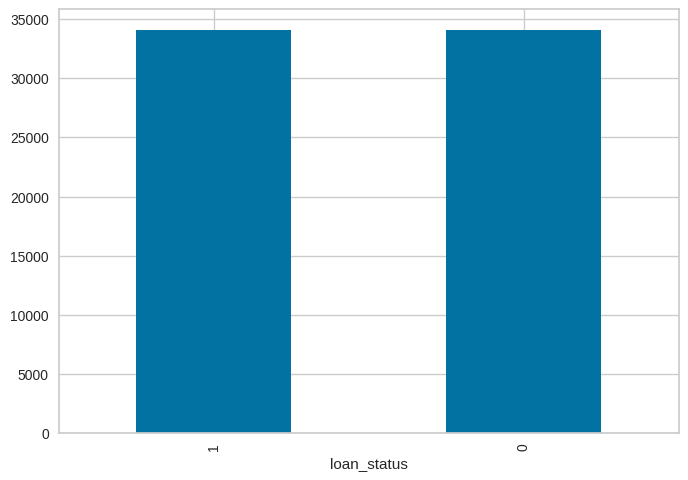

In [100]:
pd.Series(Y).value_counts().plot.bar()

In [101]:
counter = Counter(Y)
print(counter)

Counter({1: 34116, 0: 34116})


In [102]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, Y, test_size=0.30, random_state=42)

In [103]:
model_final_smote = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
model_final_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [104]:
acc_LR_smote = model_final_smote.score(X_test_smote, y_test_smote)
acc_LR_t_smote = model_final_smote.score(X_train_smote, y_train_smote)

In [105]:
roc_auc_score_smote_final = metrics.roc_auc_score(y_test_smote, model_final_smote.predict_proba(X_test_smote)[:, 1])

In [106]:
results_final = pd.DataFrame({'Method':['Logistic Regresion'], 
                            'accuracy_test': acc_LR_smote, 
                            'accuracy_train': acc_LR_t_smote, 
                            'ROC_AUC_score': roc_auc_score_smote_final})
results_final = results_final[['Method', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results_final

,Method,accuracy_test,accuracy_train,ROC_AUC_score
0,Logistic Regresion,0.645872,0.64589,0.699508
